In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

base_path = '/content/drive/MyDrive/anamoly detection'

# Lower-case sub-string mappings for robust grouping
FOLDER_KEY_TO_CLASS = {
    "benign": "Benign",
    "brute force": "brute force",
    "ddos": "DDOS",
    "dos": "Dos",
    "mirai": "Mirai",
    "recon": "Recon",
    "spoofing": "Spoofing",
    "sqlinjection": "Web-based",
    "upload attacks": "Web-based",
    "xss": "Web-based",
    "web-based": "Web-based"
}

def get_major_class(file_path):
    rel_path = os.path.relpath(file_path, base_path).lower()
    for key, val in FOLDER_KEY_TO_CLASS.items():
        if key in rel_path:
            return val
    return "Other"

all_dfs = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            try:
                df = pd.read_csv(file_path)
                if df.shape[0] < 100:
                    print(f"Skipping {file_path} (rows: {df.shape[0]})")
                    continue
                parent_class = get_major_class(file_path)
                df['attack_type'] = parent_class
                all_dfs.append(df)
                print(f"Loaded: {file_path}, parent_class: {parent_class}, shape: {df.shape}")
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

flow_df = pd.concat(all_dfs, ignore_index=True)
print("Final shape:", flow_df.shape)
print("Class distribution:\n", flow_df['attack_type'].value_counts())
flow_df.head()


Loaded: /content/drive/MyDrive/anamoly detection/Mirai/Mirai-greeth_flood.pcap_Flow.csv, parent_class: Mirai, shape: (5172, 85)
Loaded: /content/drive/MyDrive/anamoly detection/brute force/DictionaryBruteForce.pcap_Flow.csv, parent_class: brute force, shape: (3619, 85)
Loaded: /content/drive/MyDrive/anamoly detection/Recon/vulnerability scan/VulnerabilityScan.pcap_Flow.csv, parent_class: Recon, shape: (442158, 85)
Loaded: /content/drive/MyDrive/anamoly detection/benign/BenignTraffic.pcap_Flow.csv, parent_class: Benign, shape: (183630, 85)
Loaded: /content/drive/MyDrive/anamoly detection/Spoofing/Apr-spoofing/MITM-ArpSpoofing.pcap_Flow.csv, parent_class: Spoofing, shape: (73033, 85)
Loaded: /content/drive/MyDrive/anamoly detection/Spoofing/dns-spoofing/DNS_Spoofing.pcap_Flow.csv, parent_class: Spoofing, shape: (74856, 85)
Loaded: /content/drive/MyDrive/anamoly detection/DDOS/DDos-ICMP-FRAGMENTATION/DDoS-ICMP_Fragmentation.pcap_Flow.csv, parent_class: DDOS, shape: (14479, 85)
Loaded: /co

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_type
0,192.168.137.129-69.168.130.48-54639-443-6,192.168.137.129,54639,69.168.130.48,443,6,12/01/2023 11:19:00 AM,4079772,1299,651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NeedManualLabel,Mirai
1,192.168.137.129-69.168.130.48-54639-443-6,192.168.137.129,54639,69.168.130.48,443,6,12/01/2023 11:19:04 AM,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NeedManualLabel,Mirai
2,192.168.137.129-69.168.130.48-54639-443-6,192.168.137.129,54639,69.168.130.48,443,6,12/01/2023 11:19:04 AM,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NeedManualLabel,Mirai
3,192.168.137.129-69.168.130.48-54639-443-6,192.168.137.129,54639,69.168.130.48,443,6,12/01/2023 11:19:04 AM,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NeedManualLabel,Mirai
4,192.168.137.129-69.168.130.48-54639-443-6,192.168.137.129,54639,69.168.130.48,443,6,12/01/2023 11:19:04 AM,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NeedManualLabel,Mirai


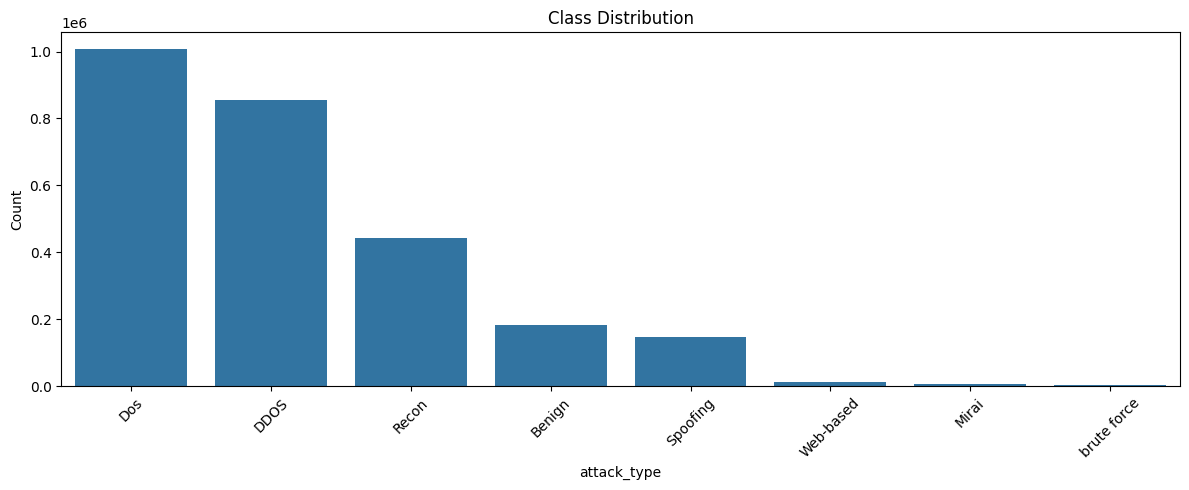

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(data=flow_df, x='attack_type', order=flow_df['attack_type'].value_counts().index)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Missing values per column:
 Flow Bytes/s    42370
dtype: int64


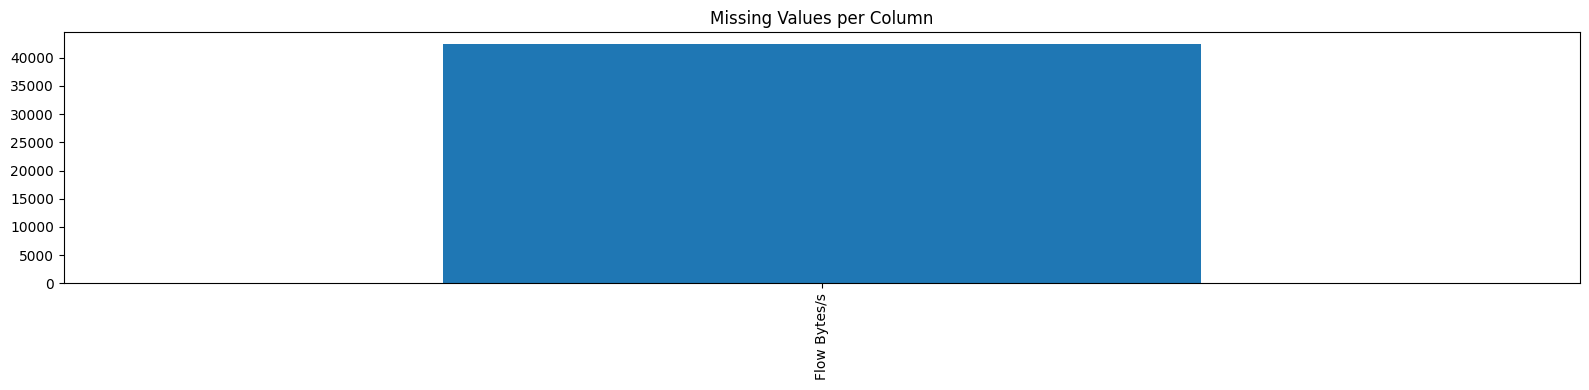

In [ ]:
missing = flow_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values per column:\n", missing)

plt.figure(figsize=(16,4))
missing.plot(kind='bar')
plt.title('Missing Values per Column')
plt.tight_layout()
plt.show()

In [ ]:
print("Data types summary:")
print(flow_df.dtypes.value_counts())

Data types summary:
float64    45
int64      34
object      6
Name: count, dtype: int64


In [ ]:
flow_df_clean = flow_df.dropna(subset=['Flow Bytes/s'])
print("After dropping rows with missing 'Flow Bytes/s':", flow_df_clean.shape)

After dropping rows with missing 'Flow Bytes/s': (2612963, 85)


In [ ]:
drop_cols = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']
flow_df_clean = flow_df_clean.drop(columns=[c for c in drop_cols if c in flow_df_clean.columns])

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
flow_df_clean['attack_type_code'] = le.fit_transform(flow_df_clean['attack_type'])
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Class mapping: {'Benign': np.int64(0), 'DDOS': np.int64(1), 'Dos': np.int64(2), 'Mirai': np.int64(3), 'Recon': np.int64(4), 'Spoofing': np.int64(5), 'Web-based': np.int64(6), 'brute force': np.int64(7)}


In [ ]:
from sklearn.model_selection import train_test_split

X = flow_df_clean.drop(['attack_type', 'attack_type_code'], axis=1)
y = flow_df_clean['attack_type_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (2090370, 79) Test shape: (522593, 79)


In [ ]:
import numpy as np

# Replace inf, -inf with NaN, then drop those rows (or you could impute)
flow_df_clean = flow_df_clean.replace([np.inf, -np.inf], np.nan)
flow_df_clean = flow_df_clean.dropna()
print("After removing inf and NaN, shape:", flow_df_clean.shape)

After removing inf and NaN, shape: (2611663, 81)


In [ ]:
X = flow_df_clean.drop(['attack_type', 'attack_type_code'], axis=1)
y = flow_df_clean['attack_type_code']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.preprocessing import StandardScaler
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])


Section 1: Anamoly Detection Multi Class

Random Forest Classification Report:
               precision    recall  f1-score   support

      Benign       0.73      0.73      0.73     36719
        DDOS       0.97      0.96      0.96    170661
         Dos       0.96      0.96      0.96    193166
       Mirai       0.64      0.36      0.46      1034
       Recon       0.81      0.87      0.84     88206
    Spoofing       0.74      0.72      0.73     29558
   Web-based       0.61      0.37      0.46      2265
 brute force       0.36      0.22      0.27       724

    accuracy                           0.91    522333
   macro avg       0.73      0.65      0.68    522333
weighted avg       0.91      0.91      0.91    522333

Random Forest Accuracy: 0.907


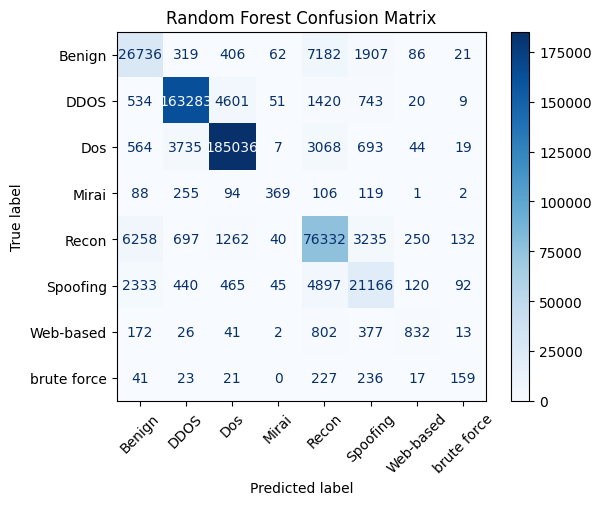

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Random Forest Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_rf)))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, display_labels=le.classes_, cmap='Blues', xticks_rotation=45)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
!pip install xgboost --quiet
import xgboost as xgb

XGBoost Classification Report:
               precision    recall  f1-score   support

      Benign       0.64      0.83      0.72     36719
        DDOS       0.97      0.93      0.95    170661
         Dos       0.97      0.94      0.95    193166
       Mirai       0.12      0.79      0.22      1034
       Recon       0.90      0.68      0.78     88206
    Spoofing       0.69      0.64      0.66     29558
   Web-based       0.14      0.69      0.24      2265
 brute force       0.05      0.86      0.09       724

    accuracy                           0.87    522333
   macro avg       0.56      0.80      0.58    522333
weighted avg       0.91      0.87      0.89    522333

XGBoost Accuracy: 0.867


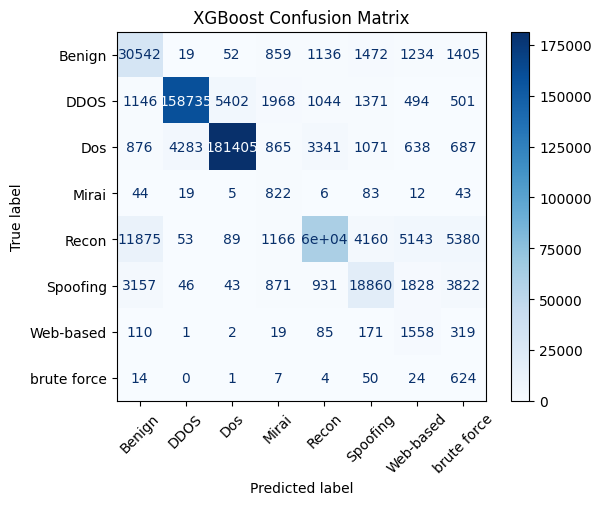

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb

# Compute sample weights for multi-class
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    objective='multi:softmax',
    num_class=len(le.classes_),
    random_state=42,
    n_jobs=-1,
    tree_method="hist"
)
xgb_model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))
print("XGBoost Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_xgb)))

ConfusionMatrixDisplay.from_estimator(
    xgb_model, X_test_scaled, y_test, display_labels=le.classes_, cmap='Blues', xticks_rotation=45
)
plt.title("XGBoost Confusion Matrix")
plt.show()

In [ ]:
!pip install tensorflow --quiet
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Sample 10% of each class for modeling (adjust frac as needed)
df_sample = flow_df_clean.groupby('attack_type', group_keys=False).apply(
    lambda x: x.sample(frac=0.1, random_state=42)
).reset_index(drop=True)
print(df_sample['attack_type'].value_counts())

attack_type
Dos            96583
DDOS           85331
Recon          44103
Benign         18360
Spoofing       14779
Web-based       1132
Mirai            517
brute force      362
Name: count, dtype: int64


/tmp/ipython-input-16-4202695322.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = flow_df_clean.groupby('attack_type', group_keys=False).apply(


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df_sample['attack_type_code'] = le.fit_transform(df_sample['attack_type'])

X = df_sample.drop(['attack_type', 'attack_type_code', 'Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label'], axis=1, errors='ignore')
y = df_sample['attack_type_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_test_scaled = scaler.transform(X_test[num_cols])

In [ ]:
import numpy as np

X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)
y_train_cnn = y_train
y_test_cnn = y_test

print("X_train_cnn shape:", X_train_cnn.shape)
print("X_test_cnn shape:", X_test_cnn.shape)

X_train_cnn shape: (208933, 79, 1)
X_test_cnn shape: (52234, 79, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = len(le.classes_)

model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(256, 3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

from sklearn.utils.class_weight import compute_class_weight
class_weights = dict(enumerate(compute_class_weight('balanced', classes=np.unique(y_train_cnn), y=y_train_cnn)))
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_cnn, y_train_cnn,
    validation_split=0.2,
    epochs=50,          # Lower for sample, increase for full
    batch_size=256,
    class_weight=class_weights,
    callbacks=[callback],
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
653/653 - 12s - 18ms/step - accuracy: 0.6002 - loss: 1.5467 - val_accuracy: 0.6698 - val_loss: 0.8895
Epoch 2/50
653/653 - 2s - 3ms/step - accuracy: 0.6476 - loss: 1.3552 - val_accuracy: 0.6585 - val_loss: 0.8701
Epoch 3/50
653/653 - 2s - 3ms/step - accuracy: 0.6947 - loss: 1.2745 - val_accuracy: 0.7368 - val_loss: 0.7689
Epoch 4/50
653/653 - 2s - 3ms/step - accuracy: 0.7150 - loss: 1.2182 - val_accuracy: 0.7303 - val_loss: 0.7300
Epoch 5/50
653/653 - 2s - 3ms/step - accuracy: 0.7251 - loss: 1.1759 - val_accuracy: 0.7483 - val_loss: 0.7499
Epoch 6/50
653/653 - 2s - 3ms/step - accuracy: 0.7325 - loss: 1.1584 - val_accuracy: 0.7606 - val_loss: 0.6820
Epoch 7/50
653/653 - 2s - 3ms/step - accuracy: 0.7363 - loss: 1.1203 - val_accuracy: 0.7342 - val_loss: 0.7214
Epoch 8/50
653/653 - 2s - 3ms/step - accuracy: 0.7381 - loss: 1.0968 - val_accuracy: 0.7448 - val_loss: 0.7299
Epoch 9/50
653/653 - 2s - 3ms/step - accuracy: 0.7459 - loss: 1.0725 - val_accuracy: 0.7535 - val_loss: 0.6708

1633/1633 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1D CNN Classification Report:
               precision    recall  f1-score   support

      Benign       0.49      0.58      0.53      3672
        DDOS       0.95      0.90      0.92     17066
         Dos       0.95      0.91      0.93     19317
       Mirai       0.05      0.63      0.10       103
       Recon       0.87      0.46      0.60      8821
    Spoofing       0.57      0.45      0.50      2956
   Web-based       0.04      0.39      0.07       227
 brute force       0.02      0.65      0.03        72

    accuracy                           0.78     52234
   macro avg       0.49      0.62      0.46     52234
weighted avg       0.88      0.78      0.81     52234



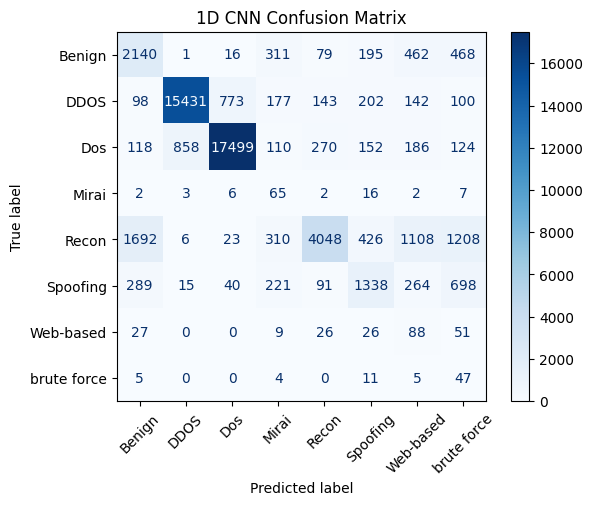

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

# Predict classes on the test set
y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis=1)

print("1D CNN Classification Report:\n", classification_report(y_test, y_pred_cnn, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_cnn, display_labels=le.classes_, cmap='Blues', xticks_rotation=45
)
plt.title("1D CNN Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
653/653 - 9s - 14ms/step - accuracy: 0.5597 - loss: 1.6873 - val_accuracy: 0.6330 - val_loss: 1.0022
Epoch 2/50
653/653 - 2s - 2ms/step - accuracy: 0.6095 - loss: 1.4944 - val_accuracy: 0.6411 - val_loss: 0.9582
Epoch 3/50
653/653 - 2s - 3ms/step - accuracy: 0.6209 - loss: 1.4275 - val_accuracy: 0.6362 - val_loss: 0.9500
Epoch 4/50
653/653 - 2s - 2ms/step - accuracy: 0.6215 - loss: 1.4040 - val_accuracy: 0.6340 - val_loss: 0.9472
Epoch 5/50
653/653 - 2s - 2ms/step - accuracy: 0.6218 - loss: 1.3749 - val_accuracy: 0.6547 - val_loss: 0.9115
Epoch 6/50
653/653 - 2s - 3ms/step - accuracy: 0.6264 - loss: 1.3624 - val_accuracy: 0.6441 - val_loss: 0.9141
Epoch 7/50
653/653 - 2s - 3ms/step - accuracy: 0.6242 - loss: 1.3594 - val_accuracy: 0.6409 - val_loss: 0.9163
Epoch 8/50
653/653 - 2s - 2ms/step - accuracy: 0.6288 - loss: 1.3254 - val_accuracy: 0.6357 - val_loss: 0.9143
Epoch 9/50
653/653 - 2s - 2ms/step - accuracy: 0.6270 - loss: 1.3387 - val_accuracy: 0.6545 - val_loss: 0.8803


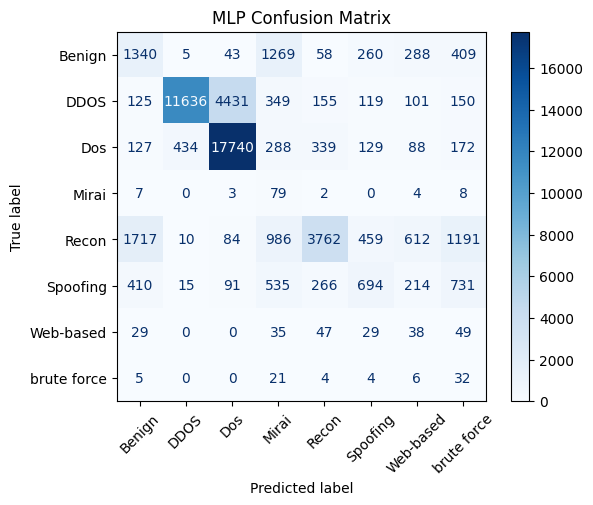

In [ ]:
from tensorflow.keras import layers, models

mlp_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

mlp_model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = mlp_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    class_weight=class_weights,
    callbacks=[callback],
    verbose=2
)

# Evaluation
y_pred_mlp = np.argmax(mlp_model.predict(X_test_scaled), axis=1)
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp, target_names=le.classes_))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_mlp, display_labels=le.classes_, cmap='Blues', xticks_rotation=45
)
plt.title("MLP Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
653/653 - 12s - 18ms/step - accuracy: 0.4504 - loss: 1.7741 - val_accuracy: 0.5116 - val_loss: 1.3208
Epoch 2/30
653/653 - 7s - 11ms/step - accuracy: 0.5204 - loss: 1.6135 - val_accuracy: 0.5483 - val_loss: 1.1797
Epoch 3/30
653/653 - 7s - 11ms/step - accuracy: 0.5532 - loss: 1.5371 - val_accuracy: 0.5566 - val_loss: 1.1244
Epoch 4/30
653/653 - 7s - 11ms/step - accuracy: 0.5677 - loss: 1.5300 - val_accuracy: 0.5309 - val_loss: 1.3453
Epoch 5/30
653/653 - 7s - 11ms/step - accuracy: 0.5794 - loss: 1.4910 - val_accuracy: 0.6090 - val_loss: 1.0423
Epoch 6/30
653/653 - 7s - 11ms/step - accuracy: 0.5893 - loss: 1.4676 - val_accuracy: 0.5986 - val_loss: 1.0818
Epoch 7/30
653/653 - 7s - 11ms/step - accuracy: 0.6035 - loss: 1.4406 - val_accuracy: 0.6072 - val_loss: 1.0424
Epoch 8/30
653/653 - 7s - 11ms/step - accuracy: 0.5653 - loss: 1.5181 - val_accuracy: 0.6030 - val_loss: 1.0222
Epoch 9/30
653/653 - 7s - 11ms/step - accuracy: 0.5653 - loss: 1.4992 - val_accuracy: 0.5979 - val_loss

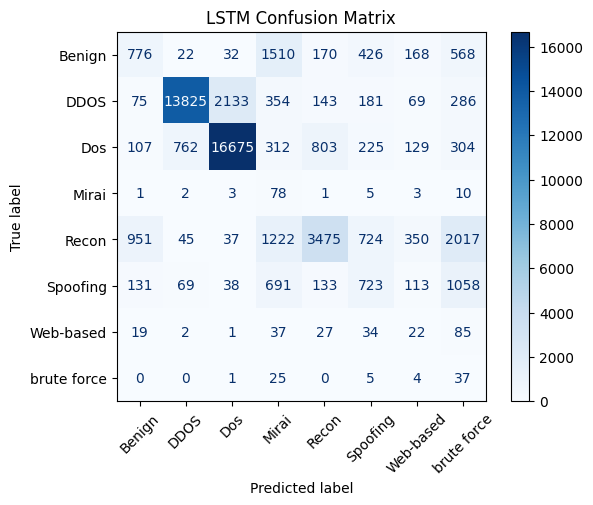

In [ ]:
from tensorflow.keras import layers, models

model_lstm = models.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(X_train_cnn.shape[1], 1)),
    layers.LSTM(64),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model_lstm.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_lstm = model_lstm.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    class_weight=class_weights,
    callbacks=[callback],
    verbose=2
)

# Evaluation:
y_pred_lstm = np.argmax(model_lstm.predict(X_test_cnn), axis=1)
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm, target_names=le.classes_))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lstm, display_labels=le.classes_, cmap='Blues', xticks_rotation=45
)
plt.title("LSTM Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
653/653 - 8s - 12ms/step - accuracy: 0.4800 - loss: 1.7377 - val_accuracy: 0.5695 - val_loss: 1.2335
Epoch 2/30
653/653 - 5s - 7ms/step - accuracy: 0.5533 - loss: 1.5794 - val_accuracy: 0.5754 - val_loss: 1.1514
Epoch 3/30
653/653 - 5s - 7ms/step - accuracy: 0.5768 - loss: 1.4934 - val_accuracy: 0.6261 - val_loss: 1.0328
Epoch 4/30
653/653 - 5s - 7ms/step - accuracy: 0.6035 - loss: 1.4315 - val_accuracy: 0.6304 - val_loss: 0.9723
Epoch 5/30
653/653 - 5s - 7ms/step - accuracy: 0.6071 - loss: 1.3989 - val_accuracy: 0.6528 - val_loss: 0.9220
Epoch 6/30
653/653 - 5s - 7ms/step - accuracy: 0.6207 - loss: 1.3623 - val_accuracy: 0.6341 - val_loss: 0.9337
Epoch 7/30
653/653 - 5s - 7ms/step - accuracy: 0.6218 - loss: 1.3360 - val_accuracy: 0.6222 - val_loss: 0.9111
Epoch 8/30
653/653 - 5s - 7ms/step - accuracy: 0.6312 - loss: 1.3077 - val_accuracy: 0.6839 - val_loss: 0.8298
Epoch 9/30
653/653 - 5s - 7ms/step - accuracy: 0.6444 - loss: 1.3021 - val_accuracy: 0.6092 - val_loss: 0.9735


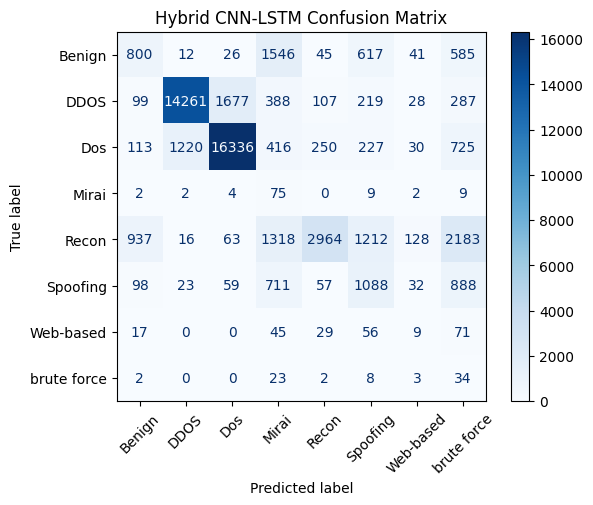

In [ ]:
model_hybrid = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.LSTM(64),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])
model_hybrid.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_hybrid = model_hybrid.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    class_weight=class_weights,
    callbacks=[callback],
    verbose=2
)
# Evaluation:
y_pred_hybrid = np.argmax(model_hybrid.predict(X_test_cnn), axis=1)
print("Hybrid CNN-LSTM Classification Report:\n", classification_report(y_test, y_pred_hybrid, target_names=le.classes_))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_hybrid, display_labels=le.classes_, cmap='Blues', xticks_rotation=45
)
plt.title("Hybrid CNN-LSTM Confusion Matrix")
plt.show()


Section 2: Device Identification (Packet Data)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Device Identification Report:
                                             precision    recall  f1-score   support

                         00:a3:d1:07:6f:03       1.00      1.00      1.00       713
                         24:05:88:30:6f:89       1.00      1.00      1.00      1523
                         3c:18:a0:41:c3:a0       1.00      1.00      1.00      4694
                         56:4f:8a:e1:f3:2d       0.99      0.97      0.98       274
                         5c:26:0a:28:80:77       0.87      0.86      0.86       204
                       AMCREST WiFi Camera       1.00      1.00      1.00       288
                     AeoTec Smart Home Hub       0.98      0.98      0.98       947
                         Amazon Echo Dot 1       1.00      0.99      0.99       826
                         Amazon Echo Dot 2       1.00      1.00      1.00      2342
                          Amazon Echo Show       1.00      1.00      1.00      4756
                        Amazon

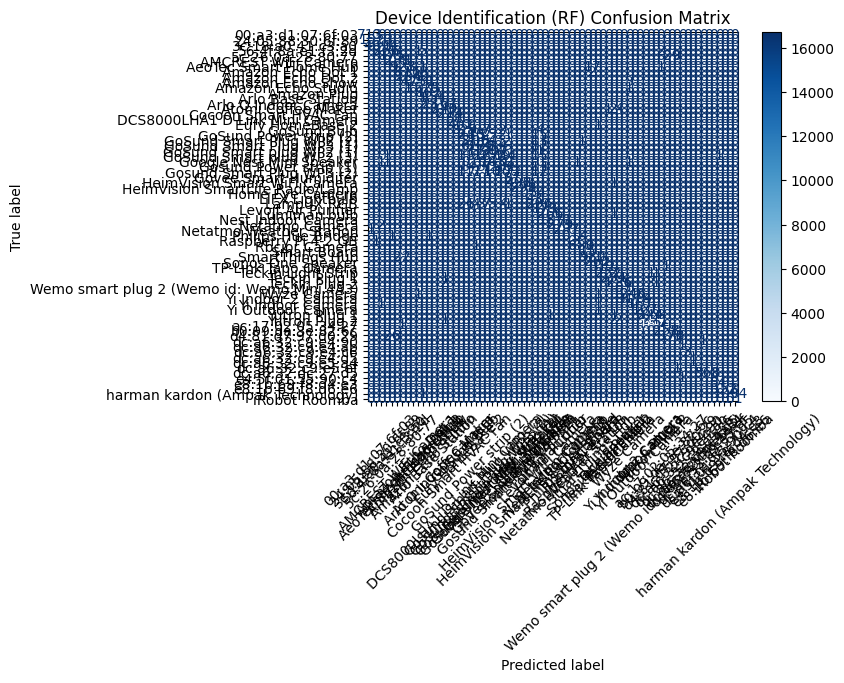

In [ ]:
# Load device packet data
device_df = pd.read_csv('/content/BenignTraffic.csv')

# Clean data: drop columns that are IDs or not predictive
drop_cols = [
    'device_mac', 'src_mac', 'dst_mac', 'src_ip', 'dst_ip', 'stream', 'timestamp'
]
feature_cols = [col for col in device_df.columns if col not in drop_cols and pd.api.types.is_numeric_dtype(device_df[col])]

# Remove classes with <2 samples
from sklearn.preprocessing import LabelEncoder
device_counts = device_df['device_mac'].value_counts()
valid_devices = device_counts[device_counts >= 2].index
device_df = device_df[device_df['device_mac'].isin(valid_devices)].copy()

# Label encode device type
le_device = LabelEncoder()
device_df['device_label'] = le_device.fit_transform(device_df['device_mac'])

X_dev = device_df[feature_cols]
y_dev = device_df['device_label']

# Train/test split and scale
from sklearn.model_selection import train_test_split
X_dev_train, X_dev_test, y_dev_train, y_dev_test = train_test_split(
    X_dev, y_dev, test_size=0.2, random_state=42, stratify=y_dev
)

from sklearn.preprocessing import StandardScaler
scaler_dev = StandardScaler()
X_dev_train_scaled = scaler_dev.fit_transform(X_dev_train)
X_dev_test_scaled = scaler_dev.transform(X_dev_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_dev = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf_dev.fit(X_dev_train_scaled, y_dev_train)
y_pred_rf_dev = rf_dev.predict(X_dev_test_scaled)

# Classification report (handle class mismatch as before)
import numpy as np
unique_labels = np.unique(y_dev_test)
target_names = le_device.inverse_transform(unique_labels)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print("Random Forest Device Identification Report:\n",
      classification_report(y_dev_test, y_pred_rf_dev, labels=unique_labels, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_dev_test, y_pred_rf_dev, labels=unique_labels, display_labels=target_names, cmap='Blues', xticks_rotation=45
)
plt.title("Device Identification (RF) Confusion Matrix")
plt.show()

# Save mapping for context-aware IDS
device_map = device_df[['src_ip', 'device_mac', 'device_label']].drop_duplicates()
device_map.to_csv('/content/device_ip_to_label_map.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost Device Identification Report:
                                             precision    recall  f1-score   support

                         00:a3:d1:07:6f:03       1.00      1.00      1.00       713
                         24:05:88:30:6f:89       1.00      1.00      1.00      1523
                         3c:18:a0:41:c3:a0       1.00      1.00      1.00      4694
                         56:4f:8a:e1:f3:2d       1.00      1.00      1.00       274
                         5c:26:0a:28:80:77       1.00      0.99      1.00       204
                       AMCREST WiFi Camera       1.00      1.00      1.00       288
                     AeoTec Smart Home Hub       1.00      1.00      1.00       947
                         Amazon Echo Dot 1       1.00      1.00      1.00       826
                         Amazon Echo Dot 2       1.00      1.00      1.00      2342
                          Amazon Echo Show       1.00      1.00      1.00      4756
                        Amazon Echo 

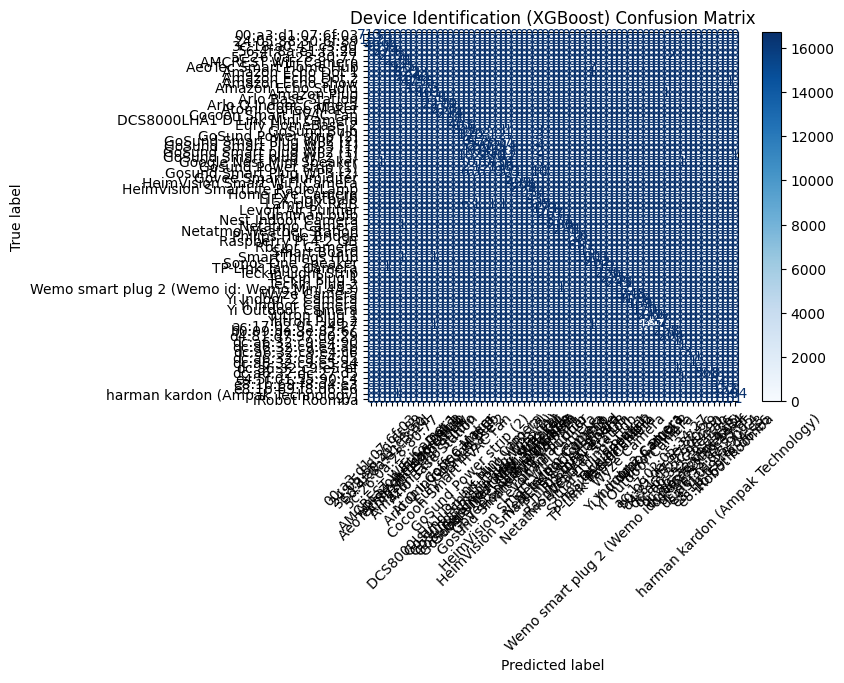

In [ ]:
# If not installed already
!pip install xgboost --quiet

import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight

# Compute class/sample weights for imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_dev_train)

xgb_dev = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=len(np.unique(y_dev_train)),
    random_state=42,
    n_jobs=-1,
    tree_method="hist"
)

xgb_dev.fit(X_dev_train_scaled, y_dev_train, sample_weight=sample_weights)
y_pred_xgb_dev = xgb_dev.predict(X_dev_test_scaled)

unique_labels = np.unique(y_dev_test)
target_names = le_device.inverse_transform(unique_labels)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("XGBoost Device Identification Report:\n",
      classification_report(y_dev_test, y_pred_xgb_dev, labels=unique_labels, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_dev_test, y_pred_xgb_dev, labels=unique_labels, display_labels=target_names, cmap='Blues', xticks_rotation=45
)
plt.title("Device Identification (XGBoost) Confusion Matrix")
plt.show()

Section 3: Context-Aware Anomaly Detection

Random Forest Context-Aware Attack Detection Report:
               precision    recall  f1-score   support

        DDOS       0.96      0.96      0.96    212528
         Dos       0.94      0.94      0.94    266108
       Mirai       0.83      0.71      0.77      2198
       Recon       0.95      0.95      0.95    566695
    Spoofing       0.95      0.95      0.95    170649
   Web-based       0.87      0.80      0.84     12267
      benign       0.86      0.86      0.86     48389
 brute force       0.86      0.84      0.85      5064

    accuracy                           0.94   1283898
   macro avg       0.90      0.88      0.89   1283898
weighted avg       0.94      0.94      0.94   1283898



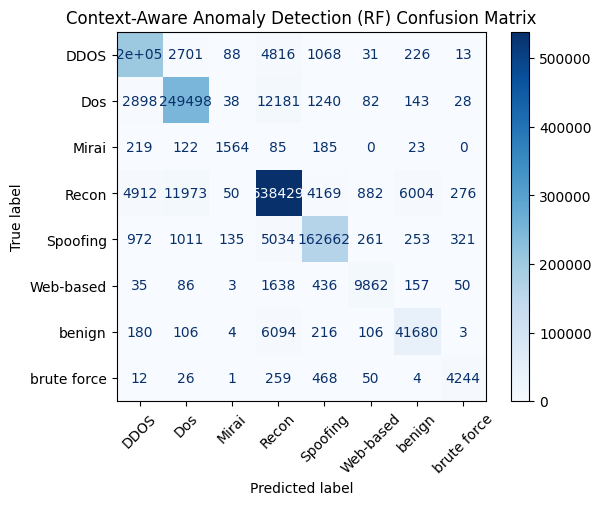

In [ ]:
# 1. Reload or ensure device_map and flow_df are ready (skip if variables already exist)

device_map = pd.read_csv('/content/device_ip_to_label_map.csv')

# If you haven't yet, load and label all flow-based files as shown before:
import os
import pandas as pd

base_path = '/content/drive/MyDrive/anamoly detection/'  # Update if needed

all_dfs = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            # Attack class = parent folder or grandparent (for nested attacks)
            parent_folder = os.path.basename(os.path.dirname(file_path))
            grandparent_folder = os.path.basename(os.path.dirname(os.path.dirname(file_path)))
            if parent_folder.lower() in ['benign', 'mirai', 'recon', 'dos', 'ddos', 'spoofing', 'web-based', 'brute force']:
                attack_label = parent_folder
            else:
                attack_label = grandparent_folder
            df = pd.read_csv(file_path)
            if df.shape[0] < 100:
                continue
            df['attack_type'] = attack_label
            all_dfs.append(df)

flow_df = pd.concat(all_dfs, ignore_index=True)

# 2. Merge device context into flow data
if 'Src IP' in flow_df.columns:
    flow_df = flow_df.rename(columns={'Src IP': 'src_ip'})
flow_df_context = flow_df.merge(device_map[['src_ip', 'device_label']], on='src_ip', how='left')
flow_df_context['device_label'] = flow_df_context['device_label'].fillna(-1).astype(int)

# 3. Feature selection
drop_cols = [
    'Flow ID', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp',
    'Label', 'src_ip', 'device_mac', 'attack_type'
]
feature_cols = [col for col in flow_df_context.columns if col not in drop_cols and pd.api.types.is_numeric_dtype(flow_df_context[col])]
X = flow_df_context[feature_cols + ['device_label']]  # device_label as context!
y = flow_df_context['attack_type']

from sklearn.preprocessing import LabelEncoder
le_attack = LabelEncoder()
y = le_attack.fit_transform(y)

# 4. Clean inf/NaN
import numpy as np
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

# 5. Train/test split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest (or XGBoost)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

unique_labels = np.unique(y_test)
target_names = le_attack.inverse_transform(unique_labels)

print("Random Forest Context-Aware Attack Detection Report:\n",
      classification_report(y_test, y_pred_rf, labels=unique_labels, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, labels=unique_labels, display_labels=target_names, cmap='Blues', xticks_rotation=45
)
plt.title("Context-Aware Anomaly Detection (RF) Confusion Matrix")
plt.show()

XGBoost Context-Aware Attack Detection Report:
               precision    recall  f1-score   support

        DDOS       0.92      0.86      0.89    212528
         Dos       0.95      0.78      0.86    266108
       Mirai       0.06      0.93      0.11      2198
       Recon       0.89      0.77      0.82    566695
    Spoofing       0.80      0.73      0.76    170649
   Web-based       0.18      0.75      0.28     12267
      benign       0.49      0.95      0.64     48389
 brute force       0.12      0.94      0.22      5064

    accuracy                           0.79   1283898
   macro avg       0.55      0.84      0.57   1283898
weighted avg       0.87      0.79      0.82   1283898



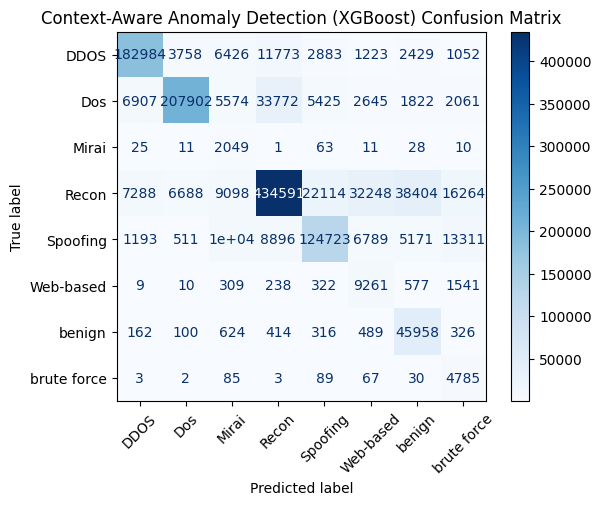

In [ ]:
# If not already installed
!pip install xgboost --quiet

import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights for class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    random_state=42,
    n_jobs=-1,
    tree_method="hist"
)
xgb_model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
y_pred_xgb = xgb_model.predict(X_test_scaled)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("XGBoost Context-Aware Attack Detection Report:\n",
      classification_report(y_test, y_pred_xgb, labels=unique_labels, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xgb, labels=unique_labels, display_labels=target_names, cmap='Blues', xticks_rotation=45
)
plt.title("Context-Aware Anomaly Detection (XGBoost) Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16049/16049 - 47s - 3ms/step - accuracy: 0.7873 - loss: 0.6373 - val_accuracy: 0.8084 - val_loss: 0.5446
Epoch 2/30
16049/16049 - 38s - 2ms/step - accuracy: 0.8066 - loss: 0.5604 - val_accuracy: 0.8155 - val_loss: 0.5127
Epoch 3/30
16049/16049 - 38s - 2ms/step - accuracy: 0.8104 - loss: 0.5424 - val_accuracy: 0.8203 - val_loss: 0.5008
Epoch 4/30
16049/16049 - 38s - 2ms/step - accuracy: 0.8127 - loss: 0.5326 - val_accuracy: 0.8237 - val_loss: 0.4905
Epoch 5/30
16049/16049 - 38s - 2ms/step - accuracy: 0.8140 - loss: 0.5266 - val_accuracy: 0.8235 - val_loss: 0.4882
Epoch 6/30
16049/16049 - 39s - 2ms/step - accuracy: 0.8157 - loss: 0.5212 - val_accuracy: 0.8257 - val_loss: 0.4805
Epoch 7/30
16049/16049 - 38s - 2ms/step - accuracy: 0.8164 - loss: 0.5185 - val_accuracy: 0.8244 - val_loss: 0.4799
Epoch 8/30
16049/16049 - 38s - 2ms/step - accuracy: 0.8170 - loss: 0.5160 - val_accuracy: 0.8257 - val_loss: 0.4749
Epoch 9/30
16049/16049 - 38s - 2ms/step - accuracy: 0.8175 - loss: 0.513

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MLP Context-Aware Attack Detection Report:
               precision    recall  f1-score   support

        DDOS       0.94      0.82      0.88    212528
         Dos       0.96      0.75      0.84    266108
       Mirai       0.56      0.00      0.00      2198
       Recon       0.78      0.96      0.86    566695
    Spoofing       0.84      0.71      0.77    170649
   Web-based       0.98      0.17      0.28     12267
      benign       0.68      0.59      0.63     48389
 brute force       0.00      0.00      0.00      5064

    accuracy                           0.83   1283898
   macro avg       0.71      0.50      0.53   1283898
weighted avg       0.84      0.83      0.83   1283898



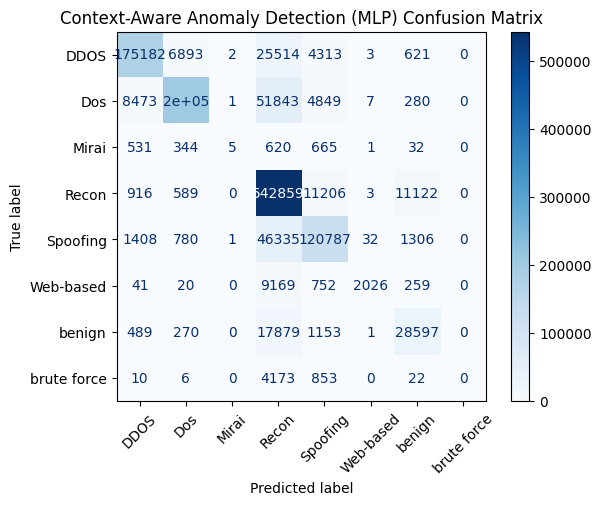

In [ ]:
model_mlp = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])
model_mlp.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_mlp = model_mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    callbacks=[callback],
    verbose=2
)

y_pred_mlp = np.argmax(model_mlp.predict(X_test_scaled), axis=1)

print("MLP Context-Aware Attack Detection Report:\n",
      classification_report(y_test, y_pred_mlp, labels=unique_labels, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_mlp, labels=unique_labels, display_labels=target_names, cmap='Blues', xticks_rotation=45
)
plt.title("Context-Aware Anomaly Detection (MLP) Confusion Matrix")
plt.show()

In [ ]:
import numpy as np
# 1D CNN expects 3D shape: [samples, timesteps, features] - for tabular, use timesteps=1
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = len(np.unique(y_train))

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    callbacks=[callback],
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16049/16049 - 54s - 3ms/step - accuracy: 0.7888 - loss: 0.6247 - val_accuracy: 0.8061 - val_loss: 0.5727
Epoch 2/30
16049/16049 - 46s - 3ms/step - accuracy: 0.8073 - loss: 0.5595 - val_accuracy: 0.8199 - val_loss: 0.5414
Epoch 3/30
16049/16049 - 46s - 3ms/step - accuracy: 0.8122 - loss: 0.5426 - val_accuracy: 0.8214 - val_loss: 0.5153
Epoch 4/30
16049/16049 - 46s - 3ms/step - accuracy: 0.8148 - loss: 0.5337 - val_accuracy: 0.8220 - val_loss: 0.5080
Epoch 5/30
16049/16049 - 46s - 3ms/step - accuracy: 0.8165 - loss: 0.5285 - val_accuracy: 0.8198 - val_loss: 0.5109
Epoch 6/30
16049/16049 - 46s - 3ms/step - accuracy: 0.8176 - loss: 0.5244 - val_accuracy: 0.8181 - val_loss: 0.5137
Epoch 7/30
16049/16049 - 46s - 3ms/step - accuracy: 0.8187 - loss: 0.5208 - val_accuracy: 0.8256 - val_loss: 0.5020
Epoch 8/30
16049/16049 - 46s - 3ms/step - accuracy: 0.8194 - loss: 0.5175 - val_accuracy: 0.8248 - val_loss: 0.5042
Epoch 9/30
16049/16049 - 46s - 3ms/step - accuracy: 0.8201 - loss: 0.514

40122/40122 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1D CNN Context-Aware Attack Detection Report:
               precision    recall  f1-score   support

        DDOS       0.94      0.82      0.88    212528
         Dos       0.94      0.76      0.84    266108
       Mirai       0.00      0.00      0.00      2198
       Recon       0.79      0.94      0.86    566695
    Spoofing       0.77      0.74      0.75    170649
   Web-based       0.93      0.16      0.27     12267
      benign       0.68      0.57      0.62     48389
 brute force       0.00      0.00      0.00      5064

    accuracy                           0.83   1283898
   macro avg       0.63      0.50      0.53   1283898
weighted avg       0.84      0.83      0.83   1283898



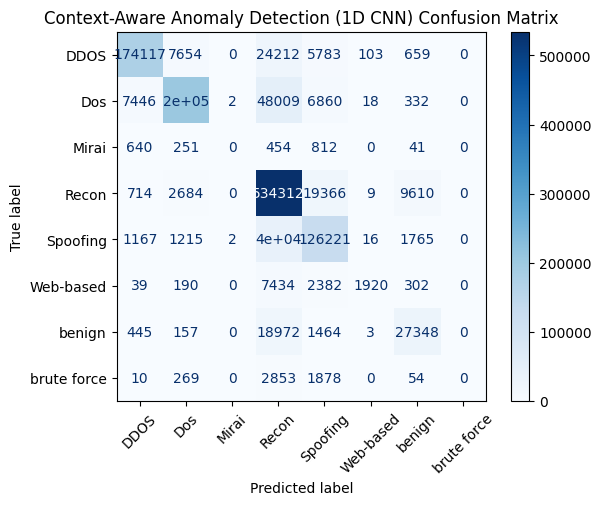

In [ ]:
y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis=1)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("1D CNN Context-Aware Attack Detection Report:\n",
      classification_report(y_test, y_pred_cnn, labels=unique_labels, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_cnn, labels=unique_labels, display_labels=target_names, cmap='Blues', xticks_rotation=45
)
plt.title("Context-Aware Anomaly Detection (1D CNN) Confusion Matrix")
plt.show()

In [ ]:
import numpy as np

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=2)  # shape: (samples, features, 1)
X_test_lstm = np.expand_dims(X_test_scaled, axis=2)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

lstm_model = models.Sequential([
    layers.LSTM(64, input_shape=(X_train_lstm.shape[1], 1), return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(32),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    callbacks=[callback],
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
16049/16049 - 172s - 11ms/step - accuracy: 0.7790 - loss: 0.6585 - val_accuracy: 0.8099 - val_loss: 0.5527
Epoch 2/30
16049/16049 - 166s - 10ms/step - accuracy: 0.8069 - loss: 0.5589 - val_accuracy: 0.8167 - val_loss: 0.5327
Epoch 3/30
16049/16049 - 166s - 10ms/step - accuracy: 0.8159 - loss: 0.5336 - val_accuracy: 0.8230 - val_loss: 0.5059
Epoch 4/30
16049/16049 - 166s - 10ms/step - accuracy: 0.8214 - loss: 0.5187 - val_accuracy: 0.8274 - val_loss: 0.4906
Epoch 5/30
16049/16049 - 168s - 10ms/step - accuracy: 0.8244 - loss: 0.5092 - val_accuracy: 0.8266 - val_loss: 0.4897
Epoch 6/30
16049/16049 - 170s - 11ms/step - accuracy: 0.8268 - loss: 0.5012 - val_accuracy: 0.8321 - val_loss: 0.4827
Epoch 7/30
16049/16049 - 168s - 10ms/step - accuracy: 0.8292 - loss: 0.4946 - val_accuracy: 0.8276 - val_loss: 0.4829
Epoch 8/30
16049/16049 - 169s - 11ms/step - accuracy: 0.8311 - loss: 0.4891 - val_accuracy: 0.8376 - val_loss: 0.4652
Epoch 9/30
16049/16049 - 167s - 10ms/step - accuracy: 0.

40122/40122 ━━━━━━━━━━━━━━━━━━━━ 125s 3ms/step
LSTM Context-Aware Attack Detection Report:
               precision    recall  f1-score   support

        DDOS       0.96      0.84      0.89    212528
         Dos       0.95      0.77      0.85    266108
       Mirai       0.47      0.06      0.10      2198
       Recon       0.79      0.96      0.87    566695
    Spoofing       0.84      0.76      0.79    170649
   Web-based       0.97      0.17      0.30     12267
      benign       0.75      0.56      0.64     48389
 brute force       0.78      0.01      0.03      5064

    accuracy                           0.85   1283898
   macro avg       0.81      0.52      0.56   1283898
weighted avg       0.86      0.85      0.84   1283898



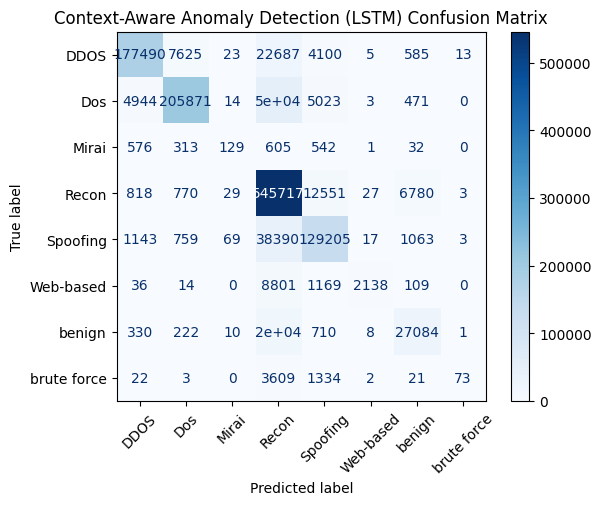

In [ ]:
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

print("LSTM Context-Aware Attack Detection Report:\n",
      classification_report(y_test, y_pred_lstm, labels=unique_labels, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lstm, labels=unique_labels, display_labels=target_names, cmap='Blues', xticks_rotation=45
)
plt.title("Context-Aware Anomaly Detection (LSTM) Confusion Matrix")
plt.show()

In [ ]:
cnn_lstm_model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(32),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

cnn_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn_lstm = cnn_lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    callbacks=[callback],
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16049/16049 - 158s - 10ms/step - accuracy: 0.8046 - loss: 0.5831 - val_accuracy: 0.8243 - val_loss: 0.5051
Epoch 2/30
16049/16049 - 153s - 10ms/step - accuracy: 0.8268 - loss: 0.4971 - val_accuracy: 0.8327 - val_loss: 0.4671
Epoch 3/30
16049/16049 - 153s - 10ms/step - accuracy: 0.8337 - loss: 0.4692 - val_accuracy: 0.8408 - val_loss: 0.4397
Epoch 4/30
16049/16049 - 153s - 10ms/step - accuracy: 0.8375 - loss: 0.4547 - val_accuracy: 0.8431 - val_loss: 0.4353
Epoch 5/30
16049/16049 - 154s - 10ms/step - accuracy: 0.8401 - loss: 0.4445 - val_accuracy: 0.8434 - val_loss: 0.4307
Epoch 6/30
16049/16049 - 154s - 10ms/step - accuracy: 0.8419 - loss: 0.4381 - val_accuracy: 0.8466 - val_loss: 0.4172
Epoch 7/30
16049/16049 - 153s - 10ms/step - accuracy: 0.8433 - loss: 0.4331 - val_accuracy: 0.8471 - val_loss: 0.4173
Epoch 8/30
16049/16049 - 154s - 10ms/step - accuracy: 0.8444 - loss: 0.4291 - val_accuracy: 0.8442 - val_loss: 0.4208
Epoch 9/30
16049/16049 - 154s - 10ms/step - accuracy: 0.

40122/40122 ━━━━━━━━━━━━━━━━━━━━ 104s 3ms/step
CNN-LSTM Context-Aware Attack Detection Report:
               precision    recall  f1-score   support

        DDOS       0.96      0.85      0.90    212528
         Dos       0.95      0.79      0.86    266108
       Mirai       0.68      0.15      0.24      2198
       Recon       0.81      0.95      0.87    566695
    Spoofing       0.84      0.78      0.81    170649
   Web-based       0.99      0.18      0.30     12267
      benign       0.69      0.69      0.69     48389
 brute force       0.51      0.20      0.29      5064

    accuracy                           0.86   1283898
   macro avg       0.81      0.57      0.62   1283898
weighted avg       0.86      0.86      0.85   1283898



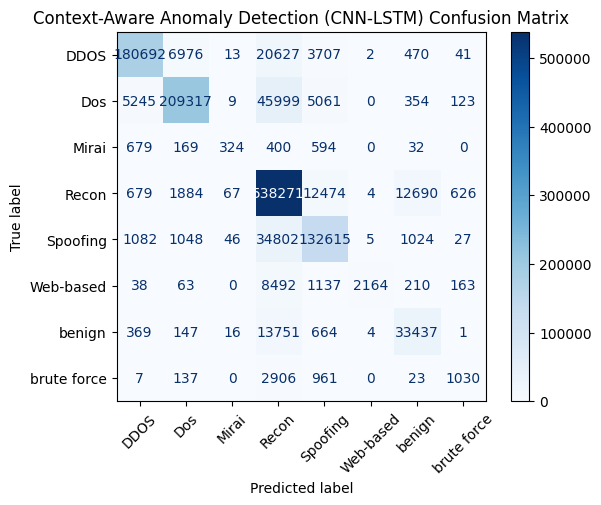

In [ ]:
y_pred_cnn_lstm = np.argmax(cnn_lstm_model.predict(X_test_lstm), axis=1)

print("CNN-LSTM Context-Aware Attack Detection Report:\n",
      classification_report(y_test, y_pred_cnn_lstm, labels=unique_labels, target_names=target_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_cnn_lstm, labels=unique_labels, display_labels=target_names, cmap='Blues', xticks_rotation=45
)
plt.title("Context-Aware Anomaly Detection (CNN-LSTM) Confusion Matrix")
plt.show()